# DC Circuit Analysis with Dependent Sources

## Simulating Resistor, Independent voltage and current sources, dependent sources

### Circuit with Voltage Controlled Current Source

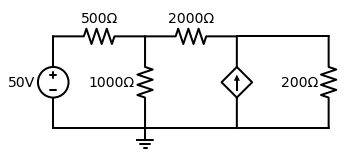

In [4]:
import schemdraw as schem
import schemdraw.elements as elm

d = schem.Drawing()

Line1 = d.add(elm.LINE, d='right')
d += elm.Line().right().length(3)
d += elm.Resistor().up().label('200Ω')
d += elm.Line().left()
d.push()
d += elm.SourceControlledI().down().reverse()
d.pop()
d += elm.Resistor().left().label('2000Ω')
d.push()
d += elm.Resistor().label('1000Ω').down()
d.pop()
d += elm.Resistor().label('500Ω').left()
d += elm.SourceV().label('50V').down().reverse()
d += elm.Line().right()
d += elm.Ground()
# d += elm.SourceI().up().label(('5A'), loc='bottom')
# d += elm.Line().left().length(2)
# d.push()
# d += elm.Resistor().down().label('4A')
# d.pop()
# d += elm.Line().up().length(2)
# d += elm.SourceControlledI().left().label('$3i_1$')
# d += elm.Line().down().length(2)
# d.push()
# d += elm.Resistor().label('2Ω').right()
# d.pop()
# d.push()
# d += elm.Resistor().label('8Ω').down()
# d.pop()
# d += elm.Resistor().label('6Ω').left()
# d += elm.Line().right()
# d += elm.Ground()

d

In [3]:




import warnings
warnings.filterwarnings('ignore')

import ipywidgets as widgets
from IPython.display import display, clear_output

R1 = widgets.IntSlider(
         value=1,
         min=0,
         max=20,
         step=1,
        orientation='vertical')

R2 = widgets.IntSlider(
         value=1,
         min=0,
         max=20,
         step=1,
        orientation='vertical')

R3 = widgets.IntSlider(
         value=1,
         min=0,
         max=20,
         step=1,
        orientation='vertical')

R4 = widgets.IntSlider(
         value=1,
         min=0,
         max=20,
         step=1,
        orientation='vertical')

I = widgets.IntSlider(
         value=1,
         min=0,
         max=20,
         step=1,
        orientation='vertical')

V1 = widgets.IntSlider(
         value=1,
         min=0,
         max=50,
         step=1,
        orientation='vertical')

F = widgets.IntSlider(
         value=1,
         min=0,
         max=20,
         step=1,
        orientation='vertical')


box = widgets.VBox([R1])
# defining a list with the contents of our windows
children = [widgets.VBox([R1]), widgets.VBox([R2]), widgets.VBox([R3]), widgets.VBox([R4]), widgets.VBox([I]), widgets.VBox([V1]), widgets.VBox([F])]
# initializing a tab
tab = widgets.Tab()
# setting the tab windows 
tab.children = children
# changing the title of the first and second window
tab.set_title(0, 'R1')
tab.set_title(1, 'R2')
tab.set_title(2, 'R3')
tab.set_title(3, 'R4')
tab.set_title(4, 'I')
tab.set_title(5, 'V1')
tab.set_title(6, 'F')
tab

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *


circuit = Circuit('Circuit with Controlled Current Voltage Source')
circuit.R(1, 2, 3, R1.value@u_Ω)
circuit.R(2, 3, circuit.gnd, R2.value@u_Ω)
circuit.R(3, 3, 4,            R3.value@u_Ω)
circuit.R(4, 4, circuit.gnd, R4.value@u_Ω)
circuit.V(1, 1, circuit.gnd, V1.value@u_V)
circuit.V('test', 1, 2,       0@u_V)
circuit.I(1, circuit.gnd, 4, I.value@u_A)
circuit.F(1, 4, 3, 'Vtest', F.value)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()

button_send = widgets.Button(
                description='Simulate Circuit',
                tooltip='Simulate',
                style={'description_width': 'initial'}
            )

output = widgets.Output()

def on_button_clicked(event):
    with output:
        clear_output()
        for node in analysis.nodes.values():
            print('Node {}: {:4.1f} V'.format(str(node), float(node)))
        for node in analysis.branches.values():
            print('Node {}: {:5.2f} A'.format(str(node), float(node)))

button_send.on_click(on_button_clicked)

vbox_result = widgets.VBox([button_send, output])

vbox_result



